В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [2]:
# Получите и загрузите данные
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Удалите все пропущенные значения и категориальные переменные. 
# Обучите модель. Выберете и посчитайте метрику качества
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data = data[pd.isnull(data['Age']) == 0]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [7]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [8]:
y = data['Survived']

In [9]:
y.head(10)

0     0
1     1
2     1
3     1
4     0
6     0
7     0
8     1
9     1
10    1
Name: Survived, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

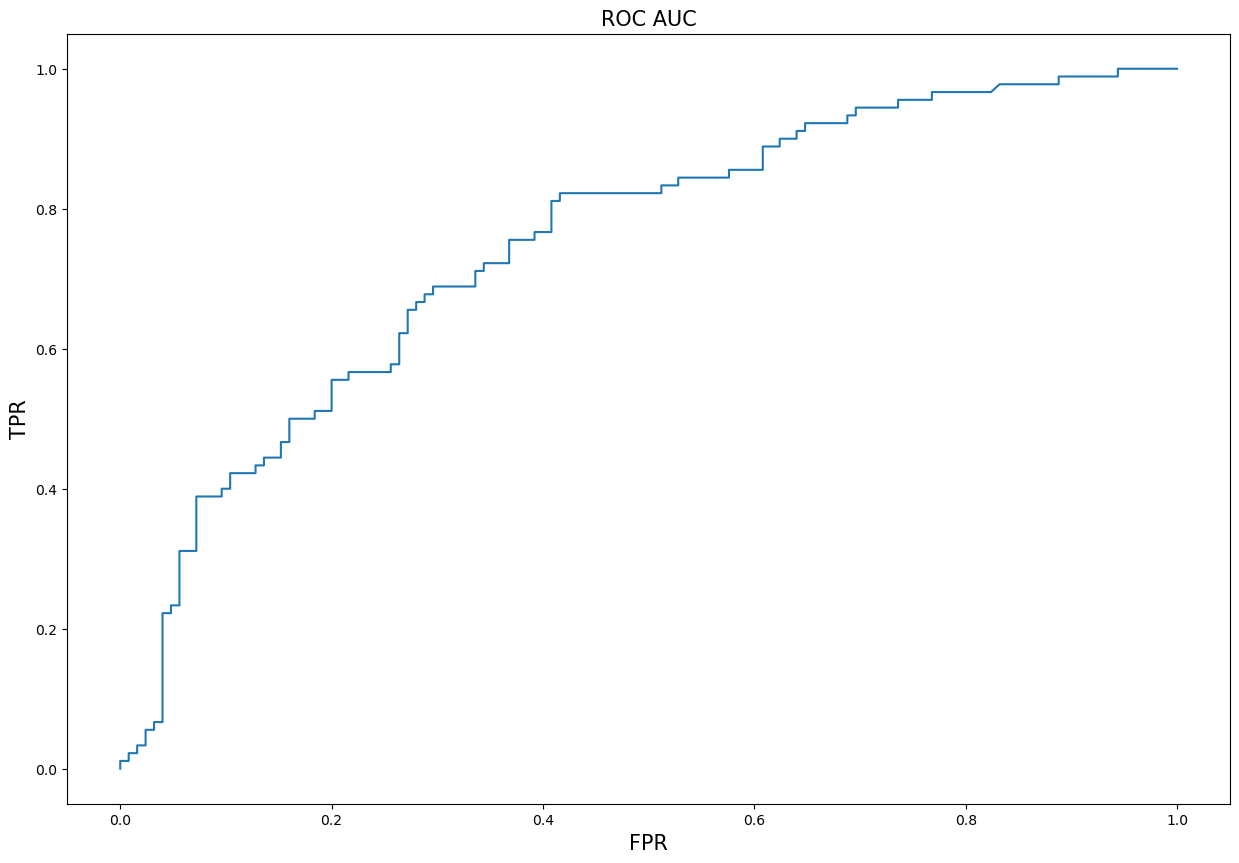

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

In [13]:
roc_auc_score(y_test, predictions[:, 1])

0.7487555555555555

In [14]:
#Снова загрузите полные данные.
#Удалите признаки, которые логически не нужны для построения модели. Обоснуйте
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId: Уникальный индекс - убираем
Name: Имя пассажира - убираем
Ticket: Номер билета - удаляем.
Cabin: Номер каюты пассажира. удаляем, тем более много пропусков
Embarked: Порт отправления данного пассажира - удаляем

Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета - оставляем
Sex: Пол пассажира. Либо мужчины (=Male) либо женщины (=Female) - оставляем
Age: Возраст пассажира - оставляем
SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром - оставляем.
Parch: Количество родителей детей - оставляем.
Fare: Сумма, которую заплатил пассажир за путешествие оставляем.
Cabin: Номер каюты пассажира. удаляем, тем более много пропусков
Embarked: Порт отправления данного пассажира - удаляем

In [15]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [17]:
# дополним пропуски в возрасте условной медианой
data.Age[data.Age.isnull()] = 30
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [18]:
# посмотрим на зависимости между Признаками (Features) и Ответом (Survival)
data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

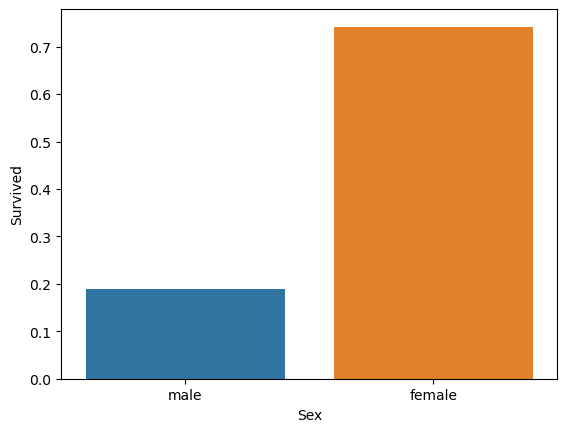

In [19]:
sns.barplot(x='Sex', y='Survived', data=data, errorbar=None)

In [20]:
# женщины имели больше шансов выжить

In [21]:
data.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [22]:
# пассажиры 1 класса имели больше вероятность спастись

<Axes: xlabel='Pclass', ylabel='Survived'>

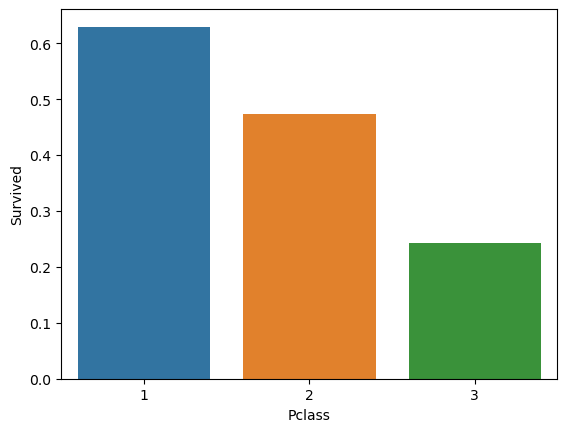

In [23]:
sns.barplot(x='Pclass', y='Survived', data=data, errorbar=None)

C:\Users\yuril\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


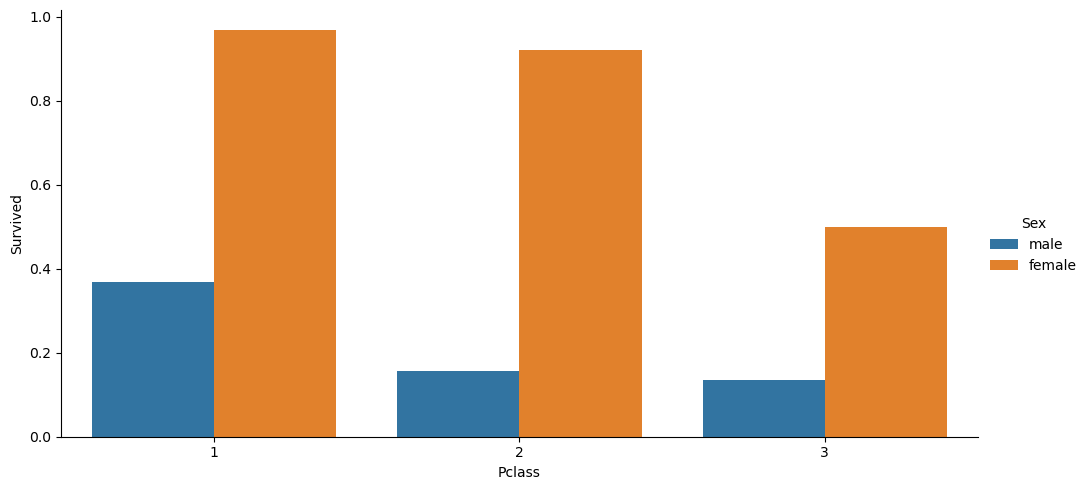

In [24]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', aspect=2, data=data, kind='bar', errorbar=None)

In [25]:
#видно, что у женщин шансов больше, в 1 классе почти 100 % спастись

<Axes: >

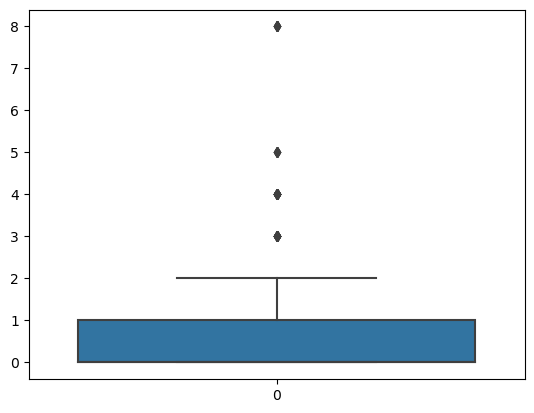

In [26]:
# посмотрим на выбросы
sns.boxplot(data['SibSp'])

<Axes: >

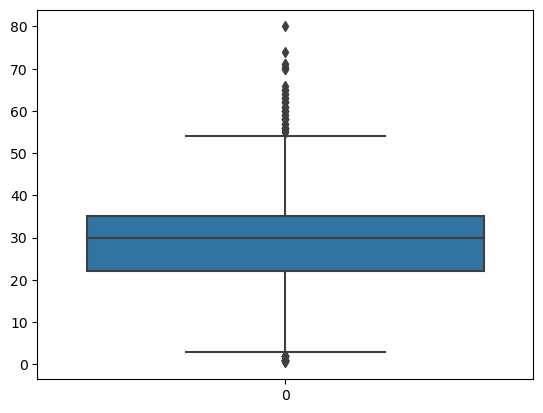

In [27]:
sns.boxplot(data['Age'])

In [28]:
# есть некоторые выбросы по братьям/сестрам, но ничего с этим делать не нужно. 
# Так же есть выбросы по возрасту,но так же ничего не трогаем

In [29]:
# построим модель

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [31]:
# преобразуем категориальную переменную 
cat_columns = ['Sex']
data = pd.get_dummies(data, columns=cat_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Sex_female  891 non-null    bool   
 6   Sex_male    891 non-null    bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 36.7 KB


In [32]:
X = data[['Pclass', 'Age', 'SibSp', 'Sex_female', 'Sex_male']]

In [33]:
y = data['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

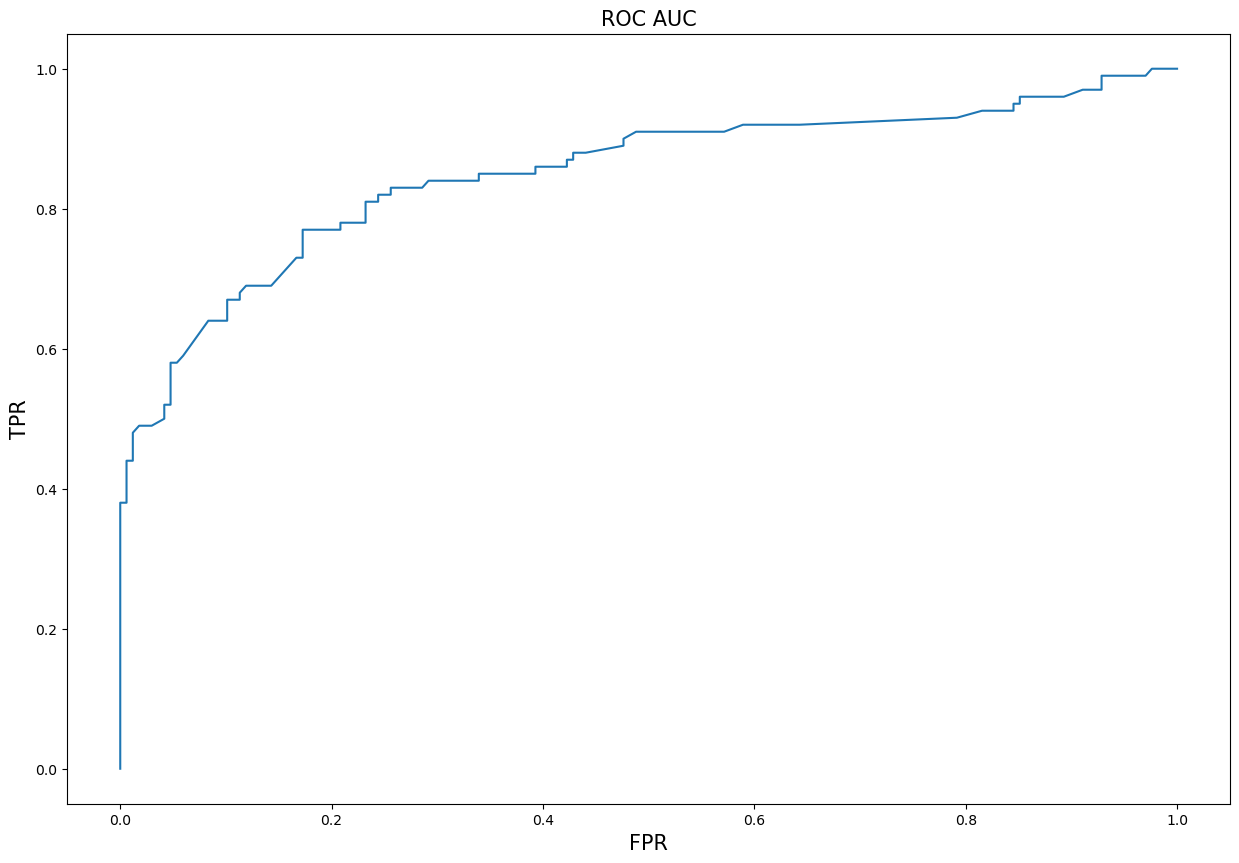

In [36]:
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

In [37]:
roc_auc_score(y_test, predictions[:, 1])

0.8501785714285716

In [38]:
# Попробуйте математически преобразовать признак Age.

In [39]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,False,True
1,1,1,38.0,1,0,True,False
2,1,3,26.0,0,0,True,False
3,1,1,35.0,1,0,True,False
4,0,3,35.0,0,0,False,True


In [40]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594
std,0.486592,0.836071,13.002570,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [41]:
# заменим признак Age 
data.Age[data.Age < 22.0] = 1.0
data.Age[(data.Age >= 22.0) & (data.Age < 35.0)] = 2.0
data.Age[data.Age >= 35.0] = 3.0
data.head(10)

C:\Users\yuril\AppData\Local\Temp\ipykernel_14244\2433947012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[data.Age < 22.0] = 1.0
C:\Users\yuril\AppData\Local\Temp\ipykernel_14244\2433947012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[(data.Age >= 22.0) & (data.Age < 35.0)] = 2.0
C:\Users\yuril\AppData\Local\Temp\ipykernel_14244\2433947012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[data

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,2.0,1,0,False,True
1,1,1,3.0,1,0,True,False
2,1,3,2.0,0,0,True,False
3,1,1,3.0,1,0,True,False
4,0,3,3.0,0,0,False,True
5,0,3,2.0,0,0,False,True
6,0,1,3.0,0,0,False,True
7,0,3,1.0,3,1,False,True
8,1,3,2.0,0,2,True,False
9,1,2,1.0,1,0,True,False


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

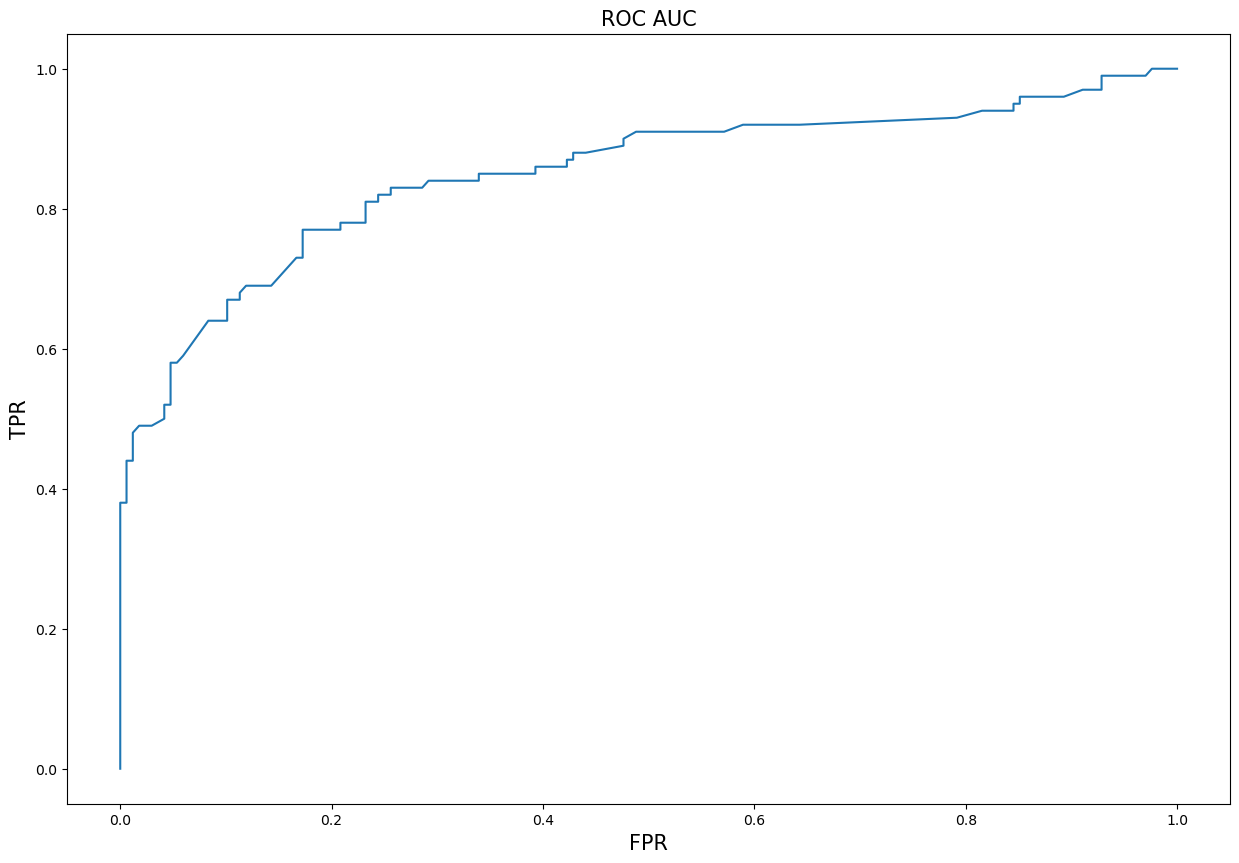

In [44]:
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

In [45]:
roc_auc_score(y_test, predictions[:, 1])

0.8501785714285716

Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

В процессе работы были заполнены медианой пропущенные данные по возрасту. Исключен ряд переменных, проведен визуальный анализ 
Заполнение пропусками повысило метрики качества